In [ ]:
import pandas as pd
import numpy as np
f0rom matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
emp_data = pd.read_csv("https://drive.google.com/uc?id=1A1Xrk8YRsYWBVQgoPaTBnt91RzGiDB5D")
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
emp_data.shape

(14999, 10)

In [ ]:
emp_data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
emp_data.dtypes

,0
satisfaction_level,float64
last_evaluation,float64
number_project,int64
average_montly_hours,int64
time_spend_company,int64
Work_accident,int64
left,int64
promotion_last_5years,int64
Department,object
salary,object


In [ ]:
emp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
emp_data[emp_data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
emp_data1 = emp_data.drop_duplicates()
emp_data1.shape

(11991, 10)

In [ ]:
emp_data1.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


In [ ]:
emp_data1['left'].value_counts()

,count
left,
0,10000
1,1991


<Axes: xlabel='left'>

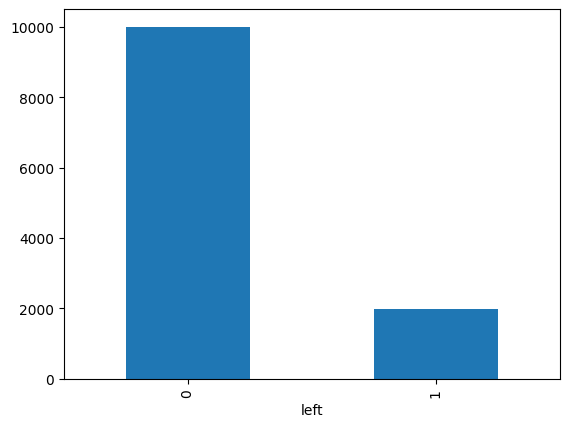

In [ ]:
emp_data1['left'].value_counts().plot(kind='bar')

In [ ]:
emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
pd.crosstab(emp_data1.salary,emp_data1.left)

left,0,1
salary,,
high,942,48
low,4566,1174
medium,4492,769


<Axes: xlabel='salary'>

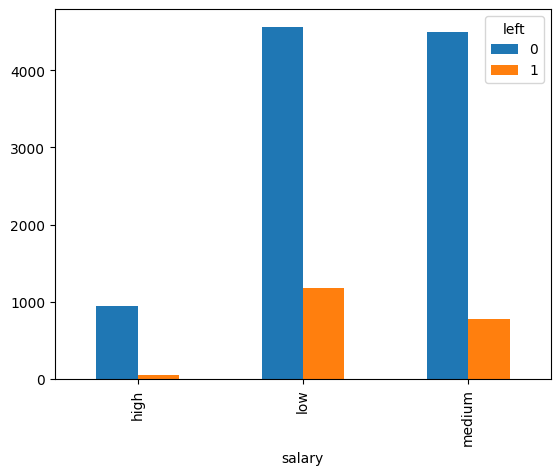

In [ ]:
pd.crosstab(emp_data1.salary,emp_data1.left).plot(kind='bar')

<Axes: xlabel='Department'>

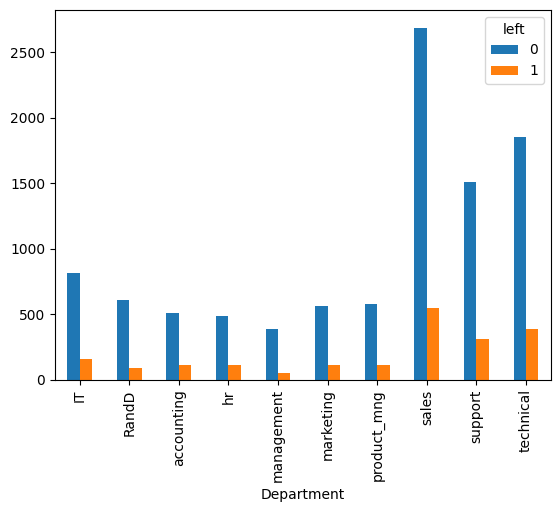

In [ ]:
pd.crosstab(emp_data1.Department,emp_data1.left).plot(kind='bar')

In [ ]:
pd.crosstab(emp_data1.Department,emp_data1.left)

left,0,1
Department,,
IT,818,158
RandD,609,85
accounting,512,109
hr,488,113
management,384,52
marketing,561,112
product_mng,576,110
sales,2689,550
support,1509,312


In [ ]:
num_feature_list1 = [f for f in emp_data1.columns if emp_data1.dtypes[f] == 'float64']
num_feature_list1

['satisfaction_level', 'last_evaluation']

In [ ]:
num_feature_list2 = [f for f in emp_data1.columns if emp_data1.dtypes[f] == 'int64']
num_feature_list2

['number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years']

In [ ]:
num_col_list =['number_project',
'average_montly_hours',
'time_spend_company',
'Work_accident',
'promotion_last_5years', 'satisfaction_level', 'last_evaluation']

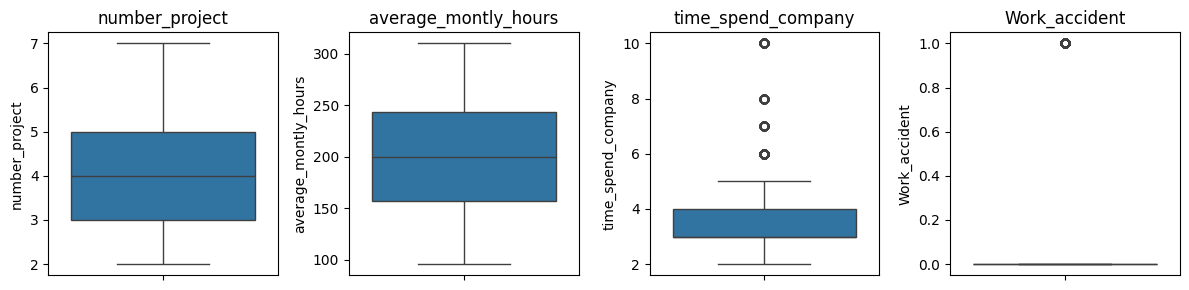

In [ ]:
fig, axes = plt.subplots(ncols=4 ,figsize = (12,3))
for column, axis in zip(num_col_list[:4], axes):
  sns.boxplot(data = emp_data1[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

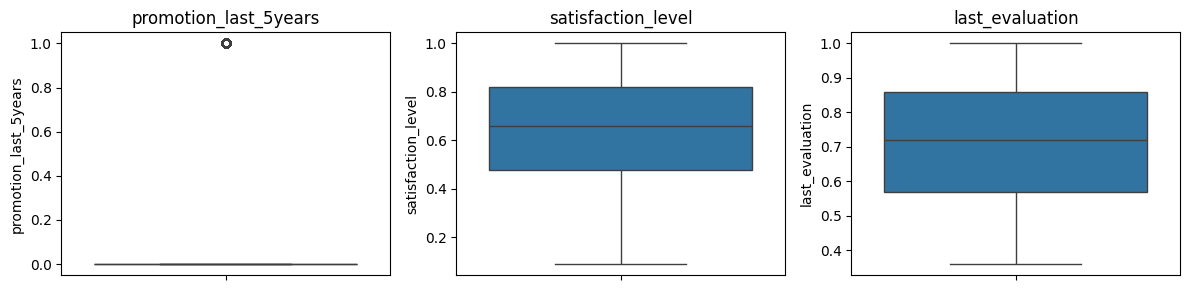

In [ ]:
fig, axes = plt.subplots(ncols = 3 ,figsize =(12,3))
for column, axis in zip(num_col_list[4:], axes):
  sns.boxplot(data = emp_data1[column], ax = axis)
  axis.set_title(column)
plt.tight_layout()
plt.show()

<Axes: ylabel='Frequency'>

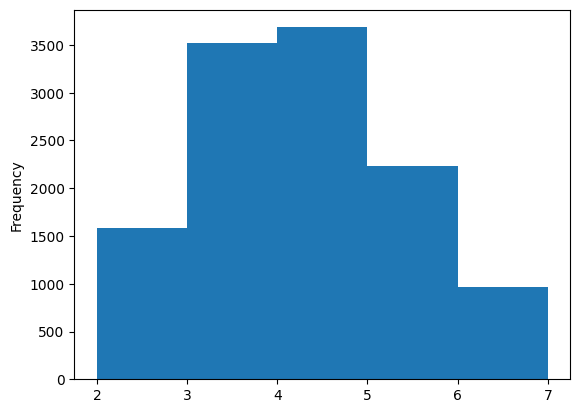

In [ ]:
emp_data1['number_project'].plot(kind ='hist', bins = 5)

<Axes: ylabel='Frequency'>

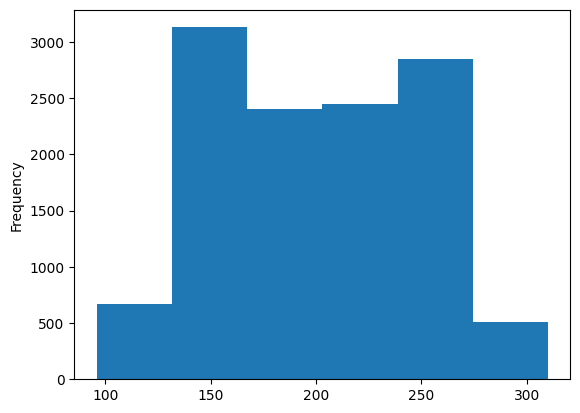

In [ ]:
emp_data1['average_montly_hours'].plot(kind='hist', bins =6)

<Axes: ylabel='Frequency'>

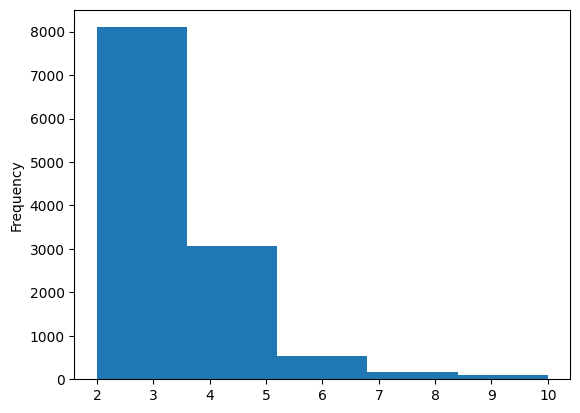

In [ ]:
emp_data1['time_spend_company'].plot(kind='hist', bins = 5)

<Axes: ylabel='Frequency'>

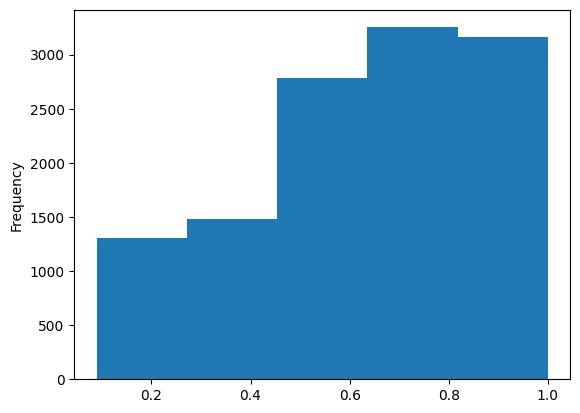

In [ ]:
emp_data1['satisfaction_level'].plot(kind='hist', bins = 5)

<Axes: ylabel='Frequency'>

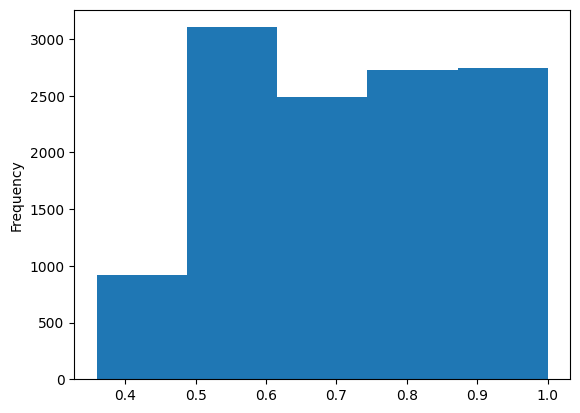

In [ ]:
emp_data1['last_evaluation'].plot(kind='hist', bins = 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
emp_data1['salary'] = label_encoder.fit_transform(emp_data1['salary'])
emp_data1['Department'] = label_encoder.fit_transform(emp_data1['Department'])

<ipython-input-32-ad852cab6717>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_data1['salary'] = label_encoder.fit_transform(emp_data1['salary'])
<ipython-input-32-ad852cab6717>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emp_data1['Department'] = label_encoder.fit_transform(emp_data1['Department'])


In [ ]:
emp_data1.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


In [ ]:
x=emp_data1.drop(['left'], axis=1)
y=emp_data1['left']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape

(9592, 9)

In [ ]:
x_train.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
6426,0.86,0.56,5,141,2,0,0,7,2
288,0.82,0.91,5,232,5,0,0,9,1
5051,0.62,0.52,3,148,3,0,0,7,2
11132,0.43,0.74,4,129,6,0,0,3,2
3687,0.85,0.79,3,156,3,0,0,7,2


In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [ ]:
x_train_scaled = std_scaler.fit_transform(x_train)
x_test_scaled = std_scaler.transform(x_test)

In [ ]:
x_train_scaled
x_test_scaled

array([[-2.22616534,  0.4312433 ,  1.89275291, ..., -0.13311211,
         0.39533766, -0.56181526],
       [ 0.4636721 ,  1.44221642,  0.17048512, ..., -0.13311211,
         0.74073148,  1.0287786 ],
       [ 0.7533469 ,  1.50168543,  0.17048512, ..., -0.13311211,
         0.39533766, -0.56181526],
       ...,
       [ 0.7533469 , -0.34185379, -0.69064878, ..., -0.13311211,
         0.39533766,  1.0287786 ],
       [ 0.29814364,  1.56115444,  0.17048512, ..., -0.13311211,
        -0.29544999, -0.56181526],
       [ 0.09123307, -0.10397776, -0.69064878, ..., -0.13311211,
         0.74073148, -0.56181526]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random_Forest_model = RandomForestClassifier()
Random_Forest_model.fit(x_train_scaled, y_train)

RandomForestClassifier()

In [ ]:
y_pred = Random_Forest_model.predict(x_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1991    7]
 [  39  362]]


<Axes: >

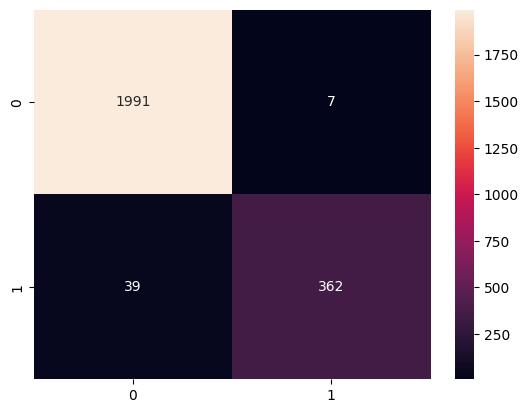

In [ ]:
sns.heatmap(cm, annot=True, fmt='d')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)
print("Accuracy of the model = ",accuracy_score(y_test, y_pred))

Accuracy of the model =  0.9808253438932889


In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)
print("Recall score of the model = ",recall_score(y_test, y_pred))

Recall score of the model =  0.9027431421446384


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)
print("F1 score of the model = ",f1_score(y_test, y_pred))

F1 score of the model =  0.9402597402597402


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1998
           1       0.98      0.90      0.94       401

    accuracy                           0.98      2399
   macro avg       0.98      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [ ]:
score_list = Random_Forest_model.feature_importances_
list_of_features = list(x.columns)
score_df = pd.DataFrame({'Feature':list_of_features, 'Score':score_list})
score_df.sort_values(by='Score', ascending=False)

,Feature,Score
0,satisfaction_level,0.358690
2,number_project,0.177754
4,time_spend_company,0.163215
3,average_montly_hours,0.155637
1,last_evaluation,0.118977
7,Department,0.012367
8,salary,0.008163
5,Work_accident,0.004504
6,promotion_last_5years,0.000693


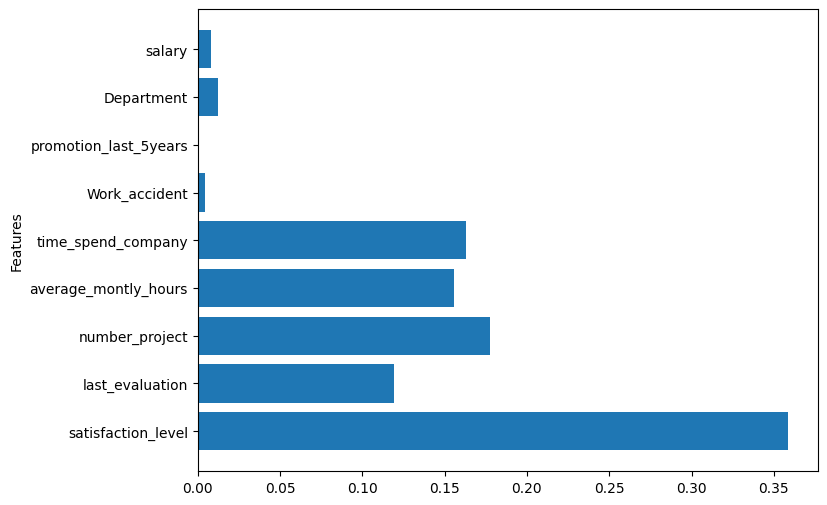

In [ ]:
list_of_features = list(x.columns)
plt.figure(figsize=(8,6))
plt.barh(range(len(list_of_features)), Random_Forest_model.feature_importances_)
plt.yticks(np.arange(len(list_of_features)),list_of_features)
plt.ylabel('Features')
plt. show()